圆环图本质上是一个中间切出一块区域的饼状图。可以使用python和matplotlib库来实现。本文主要介绍基于matplotlib实现圆环图。本文所有代码见：[Python-Study-Notes](https://github.com/luohenyueji/Python-Study-Notes/tree/master/Plot%20Items)

In [1]:
# 去掉警告
import warnings
warnings.filterwarnings("ignore")
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1 基础圆环图绘制 Basic donut plot
下面是使用matplotlib库制作的基本圆环图的实例。这里的诀窍是做一个饼图，在中间加一个白色的圆圈。注意另一个选择是使用半径radius和宽度width参数。

首先创建一个饼图，如下所示

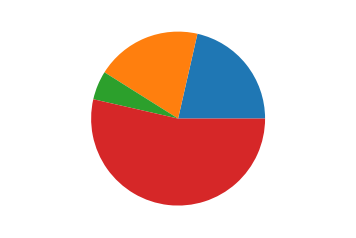

In [15]:
# library
import matplotlib.pyplot as plt


# ----- 步骤一
 
# create data
# 创建数据
size_of_groups=[12,11,3,30]
 
# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
# Create a pieplot
# 创建饼图
plt.pie(size_of_groups);
plt.show();

然后在饼图中间添加一个白色的圆，就能够得到圆环图

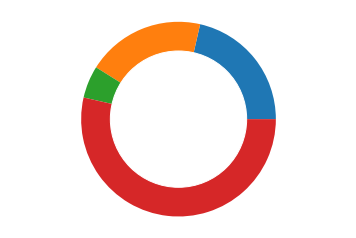

In [3]:
# library
import matplotlib.pyplot as plt


# ----- 步骤一
 
# create data
# 创建数据
size_of_groups=[12,11,3,30]
 
# Create a pieplot
# 创建饼图
plt.pie(size_of_groups)
#plt.show()
 
# ----- 步骤二

# add a circle at the center
# 添加一个圆
my_circle=plt.Circle( (0,0), 0.7, color='white')
# 获得当前显示的图表，也就是前面画的饼图
p=plt.gcf()
# 将两图相加
p.gca().add_artist(my_circle)

 
# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
plt.show();

上面创建饼图的方式太麻烦，事实上matplotlib可以直接设定pie中wedgeprops参数来实现饼图绘制,wedgeprops中通过width参数设定内部圆的半径，edgecolor设置内部圆的颜色。

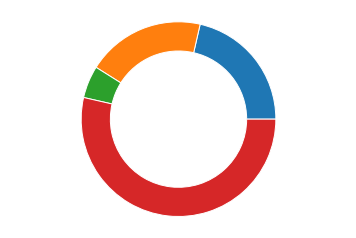

In [4]:
# library
import matplotlib.pyplot as plt


# create data
# 创建数据
size_of_groups=[12,11,3,30]
 
# Create a pieplot
# 创建饼图
plt.pie(size_of_groups,wedgeprops=dict(width=0.3, edgecolor='w'))

# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
plt.show();

# 2 自定义圆环图 Custom matplotlib donut plot
本节旨在描述如何自定义圆环图，包括自定义颜色，标签，这些操作都是通用的。

## 2.1 自定义颜色
通过设置饼图的颜色便能够实现圆环图的颜色自定义

以下示例设置不同类别的不同颜色来展示圆环图

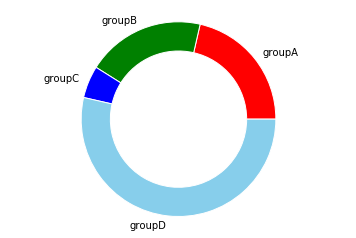

In [5]:
# library
import matplotlib.pyplot as plt
 
# create data
# 创建数据
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
# Give color names
# 画饼图，label设置标签名，colors代表颜色
plt.pie(size, labels=names, colors=['red','green','blue','skyblue'],wedgeprops=dict(width=0.3, edgecolor='w'))
 
# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
plt.show();

以下示例设置循环使用颜色来展示圆环图

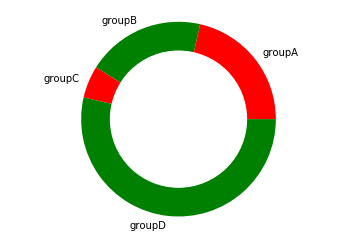

In [6]:
# library
import matplotlib.pyplot as plt
 
# create data
# 创建数据
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
# Create a circle for the center of the plot
# 创建中间白色圆
my_circle=plt.Circle( (0,0), 0.7, color='white')

 
# Custom colors --> colors will cycle
# 自定义颜色，如果颜色长度和数据长度不一致，则会循环使用颜色,即'red','green','red','green'
# 但是这种方法必须通过创建中间白色圆实现
plt.pie(size, labels=names, colors=['red','green'])
p=plt.gcf()
 
# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
p.gca().add_artist(my_circle)
plt.show();

以下示例展示通过Palettable utility库来设置颜色， Palettable utility库说明见[palettable](https://github.com/jiffyclub/palettable)

通过以下命令安装palettable
> pip install palettable

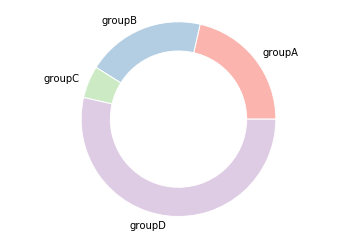

In [7]:
# library
import matplotlib.pyplot as plt
 
# create data
# 创建数据
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors,wedgeprops=dict(width=0.3, edgecolor='w'))

 
# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
plt.show();

## 2.2 自定义标签

以下示例展示自定义标签的位置

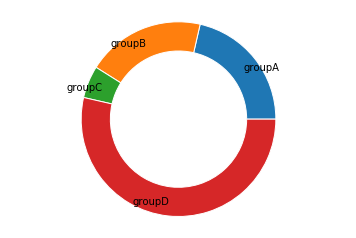

In [8]:
# library
import matplotlib.pyplot as plt
 
# create data
# 创建数据
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]


# Label distance: gives the space between labels and the center of the pie
# labeldistance给出标签和饼图中心之间的间距
plt.pie(size, labels=names, labeldistance=0.85,wedgeprops=dict(width=0.3, edgecolor='w'))
 
# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
plt.show();

以下示例展示自定义标签的颜色

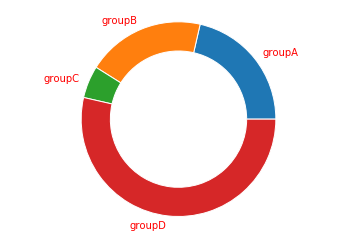

In [9]:
# library
import matplotlib.pyplot as plt
 
# create data
# 创建数据
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
# Label color
# 标签颜色
plt.rcParams['text.color'] = 'red'
plt.pie(size, labels=names,wedgeprops=dict(width=0.3, edgecolor='w'))

# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
plt.show();

对于各个类别边缘大小和颜色可以设置饼图的wedgeprops参数来实现

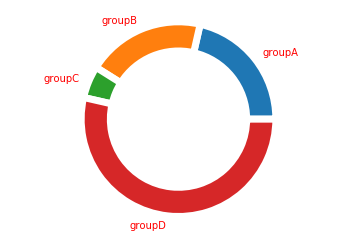

In [10]:
# library
import matplotlib.pyplot as plt
 
# create data
# 创建数据
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
# Custom wedges
# wedgeprops设置各个类别边缘宽度和颜色
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white','width':0.3, 'edgecolor':'w' })
 
# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
plt.show();

## 2.4 自定义背景颜色
以下示例展示了如何改变背景颜色

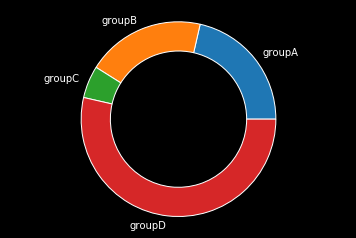

In [11]:
# library
import matplotlib.pyplot as plt

# Data
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]

# create a figure and set different background
fig = plt.figure()
# 设置背景颜色
fig.patch.set_facecolor('black')

# Change color of text
plt.rcParams['text.color'] = 'white'

# Pieplot + circle on it
plt.pie(size, labels=names,wedgeprops=dict(width=0.3, edgecolor='w'))
 
# 设置等比例轴，x和y轴等比例
plt.axis('equal') 
plt.show();

## 2.5 自定义标记
以下示例显示引出标记，来自定义圆环图

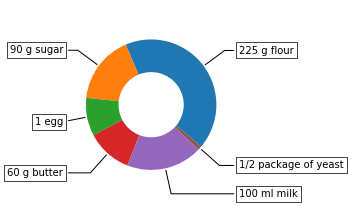

In [12]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# 类别名
recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

# startangle 设置方向
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

# 每一类别说明框
# boxstyle框的类型，fc填充颜色,ec边框颜色,lw边框宽度
bbox_props = dict(boxstyle="square,pad=0.3", fc='white', ec="black", lw=0.72)
# 设置框引出方式
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

# 添加标签
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    # 设置方向
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # 设置标注
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment,color='black', **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show();

# 3 多层级圆环图 Donut plot with subgroups
以下示例展示了具有三个类别，每个类别具有多个子类别的圆环图。你可以使用半径和宽度选项来设置2个圆级别的位置。然后，为每个组指定一个调色板。

首先绘制外圈图形，注意该实例通过setp函数实现在内部添加圆

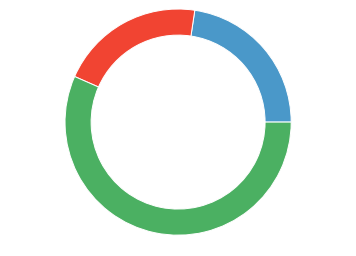

In [13]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
# 设置数据
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
# 设置颜色
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
# 外圈
fig, ax = plt.subplots()
# 设置等比例轴，x和y轴等比例
ax.axis('equal')
# 画饼图
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)],wedgeprops=dict(width=0.3, edgecolor='white'));

然后再画内圈圆，如下所示

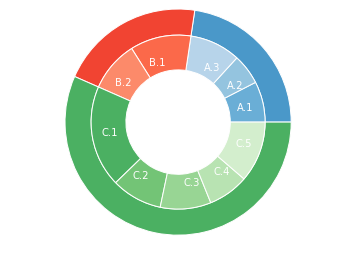

In [14]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
# 设置数据
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
# 设置颜色
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
# 外圈
fig, ax = plt.subplots()
# 设置等比例轴，x和y轴等比例
ax.axis('equal')
# 画饼图
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)],wedgeprops=dict(width=0.3, edgecolor='white'));

# Second Ring (Inside)
# 画第二个圆
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)],wedgeprops=dict(width=0.4, edgecolor='white'));

plt.margins(0,0);

# 4 参考
+ > [Nested pie charts](https://matplotlib.org/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py)
+ > [Labeling a pie and a donut](https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py)
+ > [donut-plot](http://python-graph-gallery.com/donut-plot/)